<a href="https://colab.research.google.com/github/jrandrade07/Mackenzie_Tarefas/blob/main/MultiClassPyTourch_Dry_Bens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CLASSIFICAÇÃO MULTCLASS COM PYTORCH
Modelo de classificação multi classe utilizanod a biblioteca do Pytorch
Para esse exemplo será utlizado com dataset Beans para para distinguir sete diferentes variedades registradas de feijão seco com características semelhantes, a fim de obter uma classificação uniforme das sementes.

IMPORTANDO AS BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import tqdm # somente para display da evolução do loop
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

CARREGANDO O DATASET

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jrandrade07/DataSets/main/Beans.csv")
print(df)

       Unnamed: 0   Area  Perimeter  ...  ShapeFactor3  ShapeFactor4     Class
0               0  28395    610.291  ...      0.834222      0.998724     SEKER
1               1  28734    638.018  ...      0.909851      0.998430     SEKER
2               2  29380    624.110  ...      0.825871      0.999066     SEKER
3               3  30008    645.884  ...      0.861794      0.994199     SEKER
4               4  30140    620.134  ...      0.941900      0.999166     SEKER
...           ...    ...        ...  ...           ...           ...       ...
13606       13606  42097    759.696  ...      0.642988      0.998385  DERMASON
13607       13607  42101    757.499  ...      0.676099      0.998219  DERMASON
13608       13608  42139    759.321  ...      0.676884      0.996767  DERMASON
13609       13609  42147    763.779  ...      0.668237      0.995222  DERMASON
13610       13610  42159    772.237  ...      0.616221      0.998180  DERMASON

[13611 rows x 18 columns]


ANALISANDO OS DADOS PARA POSSÍVEIS TRATAMENTOS

In [3]:
df.isnull().sum()

Unnamed: 0         0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [4]:
df[df.duplicated(keep=False)]

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class


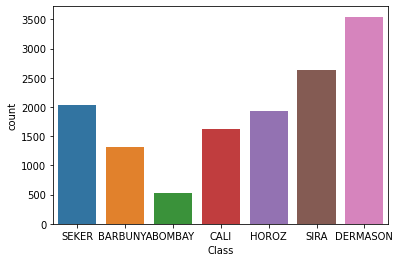

In [5]:
sns.countplot(x = 'Class', data=df)

CRIANDO UM DICIONÁRIO CHAVE VALOR COM OS DADOS DE SAIDA

In [6]:
#criando um dicionário chave valor
class2idx = {
    'SEKER':0,
    'BARBUNYA':1,
    'BOMBAY':2,
    'CALI':3,
    'HOROZ':4,
    'SIRA':5,
    'DERMASON':6
}

idx2class = {v: k for k, v in class2idx.items()}
df['Class'].replace(class2idx, inplace=True)

CRIANDO DADOS DE ENTRADA E SAÍDA

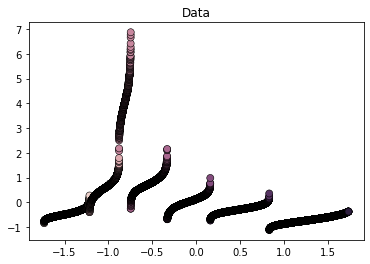

In [7]:
X = scale(df.iloc[:, 0:-1])
y = df.iloc[:, -1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker='o', s=50, edgecolor='k', legend=False).set_title("Data")
plt.show()

TREINO E TESTE SPLIT

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

DEFININDO O MODELO

In [9]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 7)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.sigmoid(self.layer3(x))        # você pode querer empregar a sigmoid ou a softmax
        x = torch.softmax(self.layer3(x), dim=1)
        return x

INICIALIZANDO

In [10]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=17, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=7, bias=True)
)

In [11]:
X_train = Variable(torch.from_numpy(np.array(X_train))).float()
y_train = Variable(torch.from_numpy(np.array(y_train))).long()
X_test  = Variable(torch.from_numpy(np.array(X_test))).float()
y_test  = Variable(torch.from_numpy(np.array(y_test))).long()

APLICANDO E OBSERVANDO AS SAÍDAS PRODUZIDAS PELO MODELO NÃO TREINADO

In [12]:
model(X_train)[0:10] # exibindo somente as 10 primeiras ocorrências

tensor([[0.1531, 0.1748, 0.1179, 0.1537, 0.1464, 0.1427, 0.1114],
        [0.1653, 0.1785, 0.1168, 0.1562, 0.1506, 0.1246, 0.1081],
        [0.1662, 0.1712, 0.1186, 0.1616, 0.1495, 0.1236, 0.1092],
        [0.1443, 0.1871, 0.1249, 0.1374, 0.1537, 0.1268, 0.1258],
        [0.1571, 0.1635, 0.1243, 0.1445, 0.1484, 0.1428, 0.1192],
        [0.1572, 0.1639, 0.1239, 0.1393, 0.1511, 0.1406, 0.1241],
        [0.1570, 0.1658, 0.1234, 0.1388, 0.1512, 0.1389, 0.1249],
        [0.1608, 0.1606, 0.1223, 0.1453, 0.1502, 0.1388, 0.1220],
        [0.1539, 0.1897, 0.1248, 0.1418, 0.1516, 0.1173, 0.1208],
        [0.1560, 0.1854, 0.1215, 0.1474, 0.1506, 0.1186, 0.1206]],
       grad_fn=<SliceBackward0>)

APLICANDO A UMA ÚNICA INSTÂNCIA DOS DADOS

In [13]:
print('Check shape X_train: ', X_train.shape)
print('Check shape X_train[0]: ', X_train[0].shape)
print('Check shape X_train[0].reshape([1,17]): ', X_train[0].reshape([1,17]).shape)

model( X_train[0].reshape([1,17]) )

Check shape X_train:  torch.Size([9527, 17])
Check shape X_train[0]:  torch.Size([17])
Check shape X_train[0].reshape([1,17]):  torch.Size([1, 17])


tensor([[0.1531, 0.1748, 0.1179, 0.1537, 0.1464, 0.1427, 0.1114]],
       grad_fn=<SoftmaxBackward0>)

TREINAMENTO

In [14]:
EPOCHS  = 150

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 150/150 [00:03<00:00, 38.32it/s]


CURVA DE APRENDIZADO

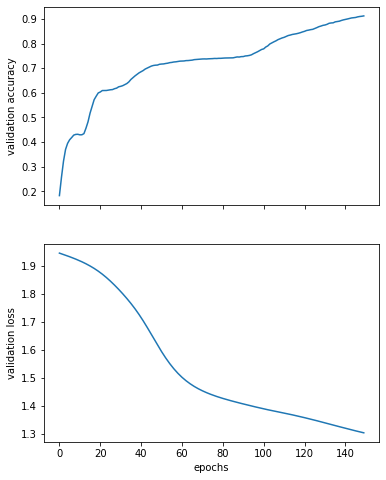

In [15]:
def plot_history(loss_list,  accuracy_list):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 8), sharex=True)

  ax1.plot(accuracy_list)
  ax1.set_ylabel("validation accuracy")
  ax2.plot(loss_list)
  ax2.set_ylabel("validation loss")
  ax2.set_xlabel("epochs")
  plt.show()

  return

plot_history(loss_list,  accuracy_list) 

PREDIÇÃO

In [16]:
X_ = Variable(torch.from_numpy(X)).float()
y_pred = model(X_)

In [17]:
y_pred = np.argmax( y_pred.detach().numpy(), axis=1 )

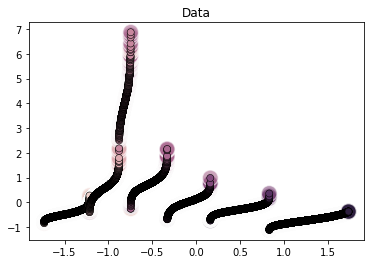

In [18]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, marker='o', s=250, legend=False, alpha=0.6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker='o', s=50, edgecolor='k', legend=False).set_title("Data")

plt.show()

ATUALIZANDO O DICIONÁRIO

In [19]:
def get_class_distribution(obj):
    count_dict = {
        "SEKER": 0,
        "BARBUNYA": 0,
        "BOMBAY": 0,
        "CALI": 0,
        "HOROZ": 0,
        "SIRA": 0,
        "DERMASON" : 0,
    }

  
    for i in obj:
        if i == 0: 
            count_dict['SEKER'] += 1
        elif i == 1: 
            count_dict['BARBUNYA'] += 1
        elif i == 2: 
            count_dict['BOMBAY'] += 1
        elif i == 3: 
            count_dict['CALI'] += 1
        elif i == 4: 
            count_dict['HOROZ'] += 1  
        elif i == 5: 
            count_dict['SIRA'] += 1 
        elif i == 6: 
            count_dict['DERMASON'] += 1              
        else:
            print("Check classes.")
            
    return count_dict

Text(0.5, 1.0, 'Distribuição de Classes nos Testes')

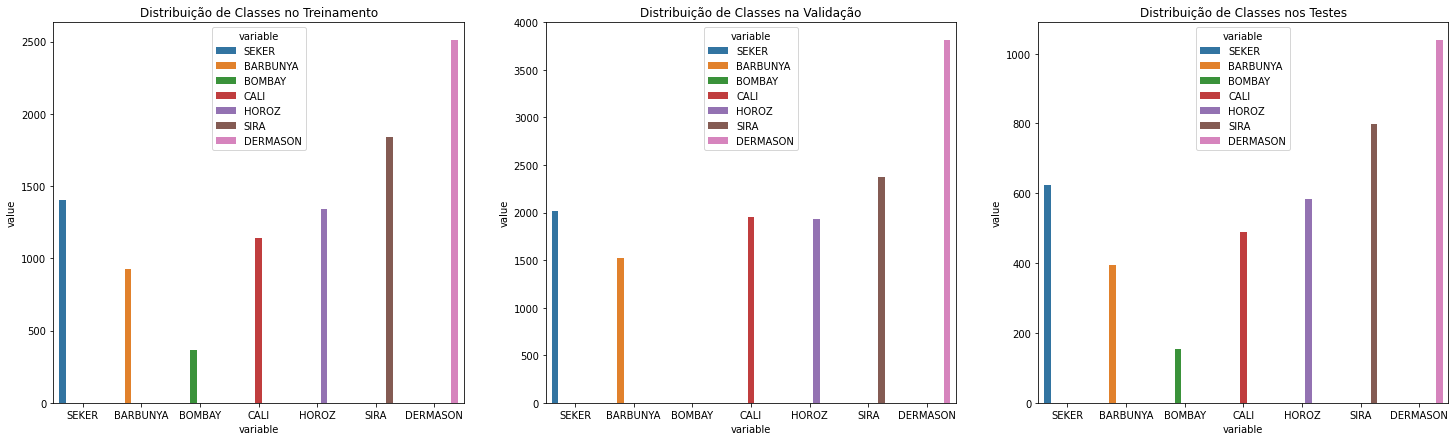

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Trainamento
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Distribuição de Classes no Treinamento')
# Validação
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_pred)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Distribuição de Classes na Validação')
# Teste
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Distribuição de Classes nos Testes')